In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import sys
sys.path.append('../my_funcs/')
from pipeline_main import pipeline
from pipeline_stress import L_transport


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

In [10]:
data = pipeline(snap = 463, run = 'sink122core02', sink_id=122)
#data = pipeline(snap = 535, run = 'sink178core03', sink_id=178)
#data = pipeline(snap = 554, run = 'sink225core03', sink_id=225)
#data = pipeline(snap=710, run='my_core_13restart', sink_id=13)
data.recalc_L(verbose = 1); 
data.calc_disksize(plot = False); data.calc_trans_xyz()

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 5026/5026 [00:17<00:00, 295.49it/s]


Converged mean angular momentum vector after 0 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 5026/5026 [00:00<00:00, 13297.65it/s]


Disk size: 220.6 au
Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 5026/5026 [00:01<00:00, 3401.47it/s]


Using 2084 patches to retrive angular momentum change
Calculating radial part
Radial 2D histogram not completely covered
Ratio of nan-valued cells to be filled by interpolation: 9.74 %
Calculating vertical part
Vertical (top) 2D histogram not completely covered
Vertical (bottom) 2D histogram not completely covered
Calculating vertical part
Calculating total angular momentum within the cylinder
Stresses for radius = 90 au, height = 180 au
Order of stresses: ['Reynolds', 'Maxwells', 'Grav. instability', 'Total'] 
0: Radial
1: Vertical
2: Total angular momentum
All values are givin in cgs-units


(array([ 4.38336829e+40, -1.76165190e+40,  2.01029148e+38,  2.64181930e+40]),
 array([ 1.95917933e+39, -3.55199995e+39, -1.06361865e+41, -1.07954686e+41]),
 1.753604527060209e+52)

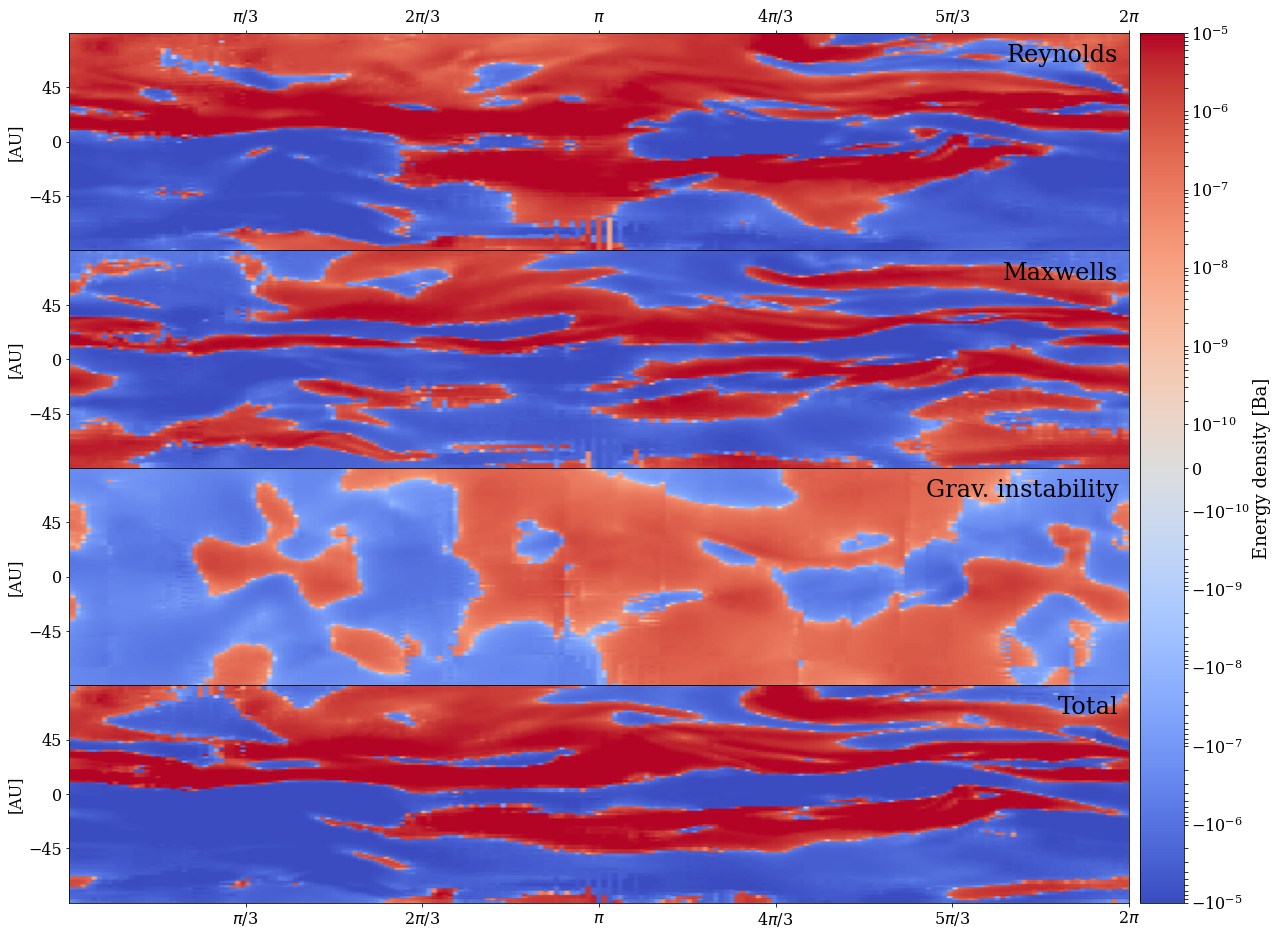

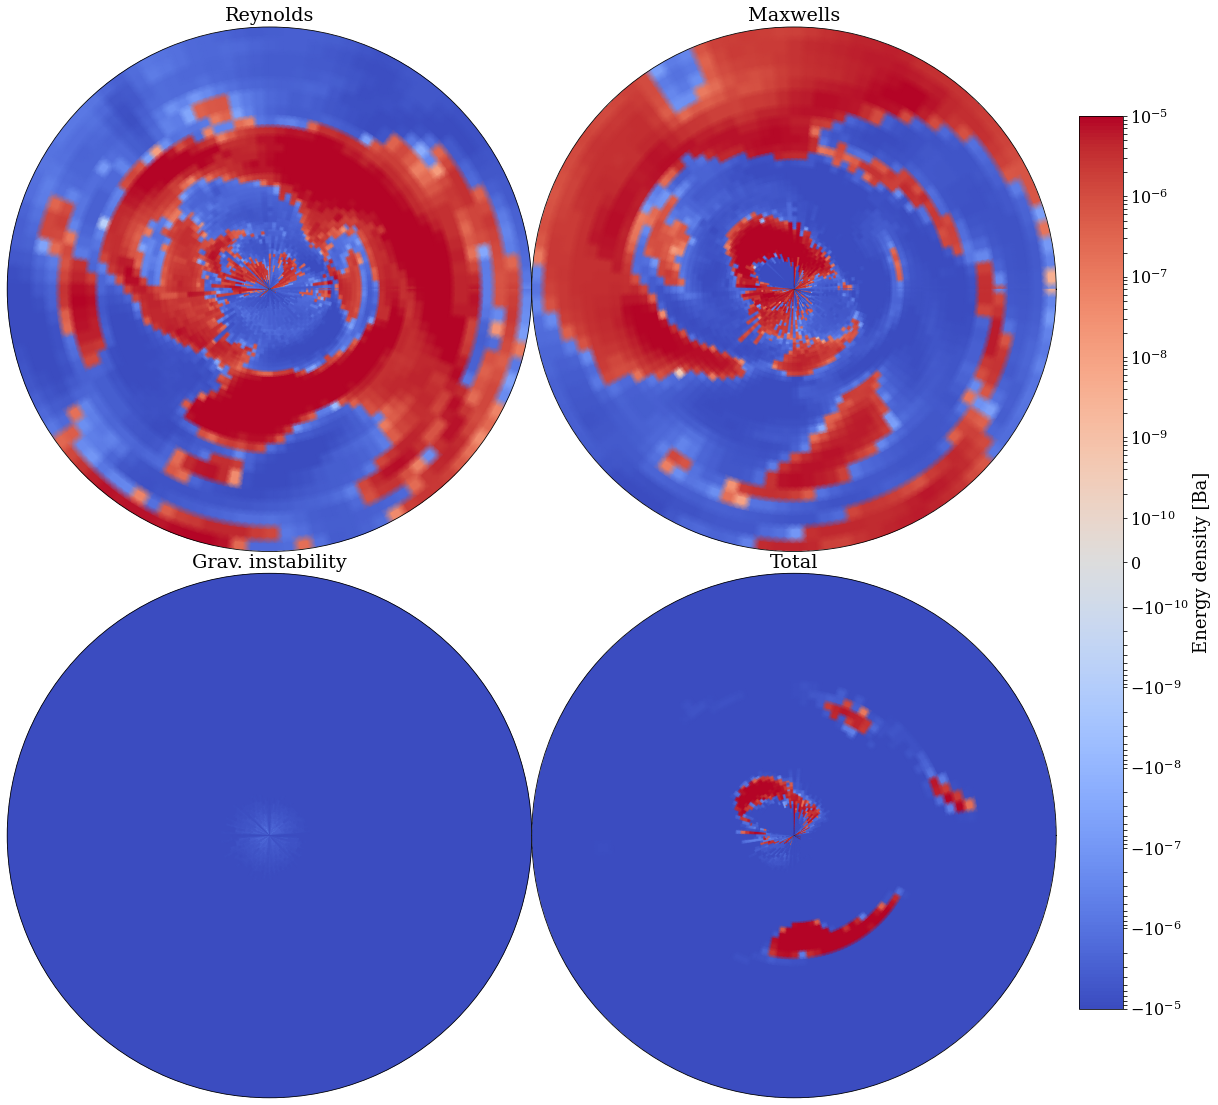

In [11]:
data.L_transport(radius=90, plot = True)
data.stresses()

In [12]:
radii = np.logspace(np.log10(10), np.log10(1000), 30)#np.array([20, 50, 100, 250, 500, 1000])
radial_part = np.zeros((len(radii), 4))
vertical_part = np.zeros((len(radii), 4))
L_tot = np.zeros(len(radii))

In [13]:
# Takes 2m 18s for 50 radii
for i in tqdm.tqdm(range(len(radii))):
    data.L_transport(radius = radii[i], plot = False, verbose = 2)
    radial_part[i], vertical_part[i], L_tot[i] = data.stresses(verbose = 0)

  0%|          | 0/30 [00:00<?, ?it/s]

Ratio of nan-valued cells to be filled by interpolation: 82.72 %


  3%|▎         | 1/30 [00:00<00:18,  1.58it/s]

Ratio of nan-valued cells to be filled by interpolation: 77.11 %


  7%|▋         | 2/30 [00:01<00:21,  1.33it/s]

Ratio of nan-valued cells to be filled by interpolation: 70.26 %


 10%|█         | 3/30 [00:02<00:21,  1.24it/s]

Ratio of nan-valued cells to be filled by interpolation: 61.31 %


 13%|█▎        | 4/30 [00:03<00:24,  1.05it/s]

Ratio of nan-valued cells to be filled by interpolation: 49.65 %


 17%|█▋        | 5/30 [00:04<00:28,  1.14s/it]

Ratio of nan-valued cells to be filled by interpolation: 37.37 %


 20%|██        | 6/30 [00:06<00:30,  1.28s/it]

Ratio of nan-valued cells to be filled by interpolation: 23.53 %


 23%|██▎       | 7/30 [00:09<00:41,  1.82s/it]

Ratio of nan-valued cells to be filled by interpolation: 11.05 %


 27%|██▋       | 8/30 [00:12<00:51,  2.33s/it]

Ratio of nan-valued cells to be filled by interpolation: 6.48 %


 30%|███       | 9/30 [00:16<00:59,  2.84s/it]

Ratio of nan-valued cells to be filled by interpolation: 9.18 %


 33%|███▎      | 10/30 [00:21<01:08,  3.45s/it]

Ratio of nan-valued cells to be filled by interpolation: 10.07 %


 37%|███▋      | 11/30 [00:27<01:17,  4.08s/it]

Ratio of nan-valued cells to be filled by interpolation: 7.18 %


 40%|████      | 12/30 [00:33<01:25,  4.77s/it]

Ratio of nan-valued cells to be filled by interpolation: 4.28 %


 43%|████▎     | 13/30 [00:40<01:31,  5.39s/it]

Ratio of nan-valued cells to be filled by interpolation: 7.77 %


 47%|████▋     | 14/30 [00:47<01:33,  5.86s/it]

Ratio of nan-valued cells to be filled by interpolation: 10.16 %


 50%|█████     | 15/30 [00:54<01:35,  6.36s/it]

Ratio of nan-valued cells to be filled by interpolation: 9.98 %


 53%|█████▎    | 16/30 [01:00<01:26,  6.18s/it]

Ratio of nan-valued cells to be filled by interpolation: 7.63 %


 57%|█████▋    | 17/30 [01:08<01:28,  6.82s/it]

Ratio of nan-valued cells to be filled by interpolation: 9.68 %


 60%|██████    | 18/30 [01:17<01:27,  7.26s/it]

Ratio of nan-valued cells to be filled by interpolation: 11.96 %


 63%|██████▎   | 19/30 [01:25<01:24,  7.73s/it]

Ratio of nan-valued cells to be filled by interpolation: 15.23 %


 67%|██████▋   | 20/30 [01:35<01:21,  8.12s/it]

Ratio of nan-valued cells to be filled by interpolation: 11.64 %


 70%|███████   | 21/30 [01:43<01:15,  8.37s/it]

Ratio of nan-valued cells to be filled by interpolation: 8.71 %


 73%|███████▎  | 22/30 [01:52<01:06,  8.35s/it]

Ratio of nan-valued cells to be filled by interpolation: 16.87 %


 77%|███████▋  | 23/30 [02:01<00:59,  8.47s/it]

Ratio of nan-valued cells to be filled by interpolation: 19.47 %


 80%|████████  | 24/30 [02:09<00:51,  8.56s/it]

Ratio of nan-valued cells to be filled by interpolation: 18.86 %


 83%|████████▎ | 25/30 [02:18<00:43,  8.69s/it]

Ratio of nan-valued cells to be filled by interpolation: 15.57 %


 87%|████████▋ | 26/30 [02:27<00:35,  8.81s/it]

Ratio of nan-valued cells to be filled by interpolation: 20.00 %


 90%|█████████ | 27/30 [02:33<00:23,  7.79s/it]

Ratio of nan-valued cells to be filled by interpolation: 24.68 %


 93%|█████████▎| 28/30 [02:38<00:14,  7.06s/it]

Ratio of nan-valued cells to be filled by interpolation: 27.97 %


 97%|█████████▋| 29/30 [02:44<00:06,  6.60s/it]

Ratio of nan-valued cells to be filled by interpolation: 27.06 %


100%|██████████| 30/30 [02:49<00:00,  5.65s/it]


In [14]:
stress_names = ['Reynolds', 'Maxwells', 'Grav. instability', 'Total']
color = ['red', 'blue', 'green']

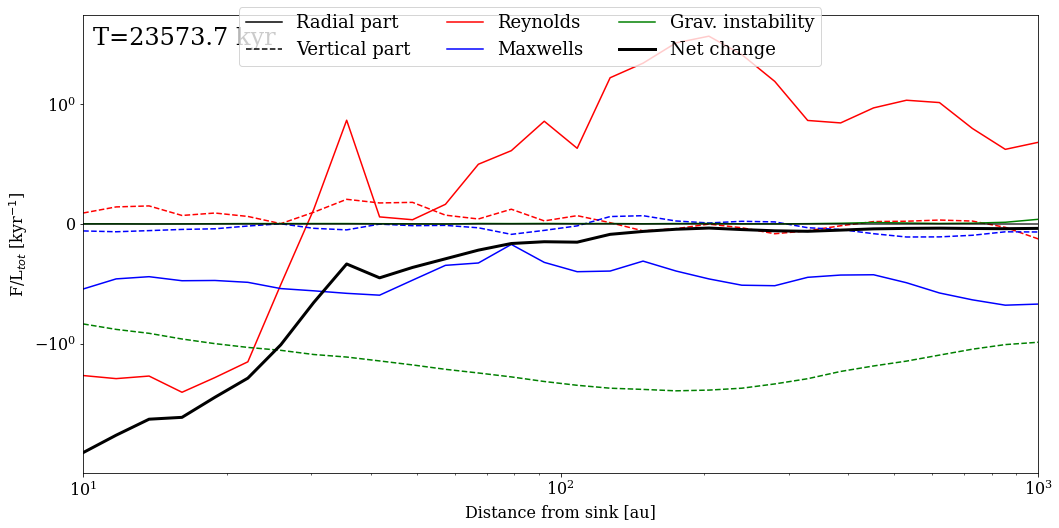

In [15]:
fig, axs = plt.subplots(figsize = (12*1.25, 6*1.25))

axs.set(ylabel = 'F/L$_{tot}$ [kyr$^{-1}$]', xlabel = 'Distance from sink [au]', xlim = (radii[0], radii[-1]))

axs.plot(-100, 0, '-', label = 'Radial part', c='black')
axs.plot(-100, 0, '--', label = 'Vertical part', c='black')
for i in range(3):
    axs.plot(radii, (radial_part[:,i] / L_tot[i]) * 1e3 * data.sn.cgs.yr, '-',label = stress_names[i], color = color[i])
    axs.plot(radii, (vertical_part[:,i] / L_tot[i]) * 1e3 * data.sn.cgs.yr, '--', color = color[i])

axs.plot(radii, (radial_part[:,-1] + vertical_part[:,-1]) / L_tot * 1e3 * data.sn.cgs.yr, lw = 3, color = 'black', label = 'Net change')

axs.set_yscale('symlog', linthresh=1, linscale=0.5); axs.set_xscale('log')
axs.text(0.01, 0.975, f'T={data.time/1e3:2.1f} kyr', transform=axs.transAxes, ha='left', va='top', fontsize = 24)
axs.axhline(0, color = 'black', alpha = 0.8)

fig.legend(frameon = True,  bbox_to_anchor=(0.5, 1.), ncol=3, loc='upper center', prop={'size':18})
fig.tight_layout()

### How do we account for the fact that materical hits the sink? So far it looks like we have an increase of angular momentum throughout the part of the system where the disk is present
### PLot: $$\frac{F_{cyl} - F_{min}}{L_{cyl} - L_{min}}$$

### $F_min$ contains all the angular momentum changes in the inner most cylinder, but we are only interested in the mass flux or the angular momemtum lost. The mass flux is related with the Reynolds stress in the radial direction:
### $$\frac{F_{cyl} -F_{min}^{r, reynolds}}{L_{cyl}}$$

/tmp/ipykernel_2130846/293016313.py:13: RuntimeWarning: invalid value encountered in true_divide
  axs.plot(radii, (radial_part[:,-1] + vertical_part[:,-1] - F_min) / (L_tot - L_min) * 1e3 * data.sn.cgs.yr, lw = 3, label = '(F_cyl - F_min) / (L_cyl - L_min)')
/tmp/ipykernel_2130846/293016313.py:14: RuntimeWarning: divide by zero encountered in true_divide
  axs.plot(radii, (radial_part[:,-1] + vertical_part[:,-1] - (radial_part[0,0] + vertical_part[0,0])) / (L_tot - L_min) * 1e3 * data.sn.cgs.yr, lw = 3, label = '(F_cyl - F$_{min}^{reynolds}$) / (L_cyl - L_min)')


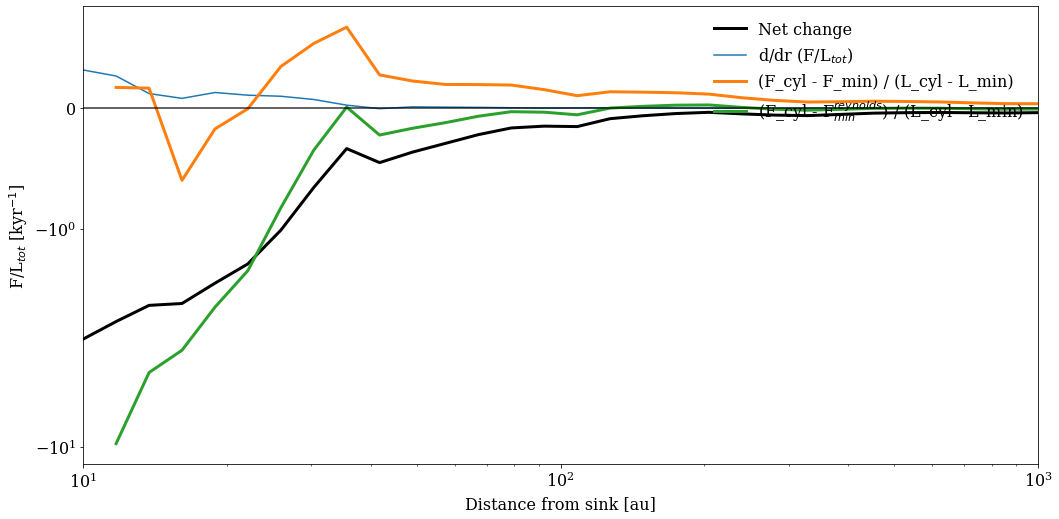

In [16]:
fig, axs = plt.subplots(figsize = (12*1.25, 6*1.25))

axs.set(ylabel = 'F/L$_{tot}$ [kyr$^{-1}$]', xlabel = 'Distance from sink [au]', xlim = (radii[0], radii[-1]))


F_min = radial_part[0,-1] + vertical_part[0,-1]
L_min = L_tot[0]
net_change = (radial_part[:,-1] + vertical_part[:,-1]) / L_tot * 1e3 * data.sn.cgs.yr

axs.plot(radii, net_change, lw = 3, color = 'black', label = 'Net change')
axs.plot(radii, np.gradient(net_change, radii), label = 'd/dr (F/L$_{tot}$)')
#   The first point is not visible since we are dividing with 0    ####
axs.plot(radii, (radial_part[:,-1] + vertical_part[:,-1] - F_min) / (L_tot - L_min) * 1e3 * data.sn.cgs.yr, lw = 3, label = '(F_cyl - F_min) / (L_cyl - L_min)')
axs.plot(radii, (radial_part[:,-1] + vertical_part[:,-1] - (radial_part[0,0] + vertical_part[0,0])) / (L_tot - L_min) * 1e3 * data.sn.cgs.yr, lw = 3, label = '(F_cyl - F$_{min}^{reynolds}$) / (L_cyl - L_min)')

axs.set_yscale('symlog', linthresh=1, linscale=0.5); axs.set_xscale('log')
axs.axhline(0, color = 'black', alpha = 0.8)

plt.legend(frameon = False, loc = 'upper right')
fig.tight_layout()

#### Should $\frac{dL}{dt}$ be negative throughout the whole disk? The disk size is only about  50 au which approx. is there it drops below 0.